In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import math

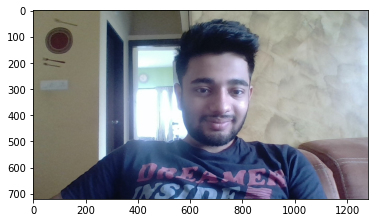

In [2]:
img = cv2.imread('Sample.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
imgplot = plt.imshow(img)
plt.show()

In [3]:
def monoalphabetic_key_generation():
    original_pool = np.arange(0,256)
    shuffled_pool = np.copy(original_pool)
    np.random.shuffle(shuffled_pool)
    mapping = dict(zip(original_pool, shuffled_pool))
    reverse_mapping = dict(zip(shuffled_pool, original_pool))
    return mapping,reverse_mapping

def monoalphabetic_cipher_color_encrypt(image,mapping_key):
    key_list = np.array(list(mapping_key.keys()))
    value_list = np.array(list(mapping_key.values()))
    mapping_array = np.zeros(key_list.max()+1,dtype=value_list.dtype)
    mapping_array[key_list] = value_list
    encrypted_image = mapping_array[image]
    return encrypted_image

def monoalphabetic_cipher_color_decrypt(image,reverse_mapping_key):
    key_list = np.array(list(reverse_mapping_key.keys()))
    value_list = np.array(list(reverse_mapping_key.values()))
    reverse_mapping_array = np.zeros(key_list.max()+1,dtype=value_list.dtype)
    reverse_mapping_array[key_list] = value_list
    decrypted_image = reverse_mapping_array[image]
    return decrypted_image

In [4]:
key,reverse_key = monoalphabetic_key_generation()
# key = {1:255,5:234,2:231,7:45,47:78,249:113}
# reverse_key = {255:1,234:5,231:2,45:7,78:47,113:249}

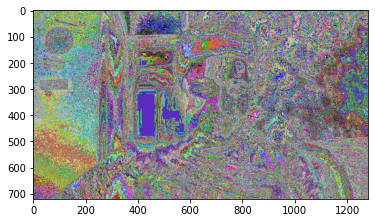

In [5]:
encrypted_img = monoalphabetic_cipher_color_encrypt(img, key)
plt.imsave("Sample_encrypted.png",encrypted_img.astype('uint8'))
encrypted_imgplot = plt.imshow(encrypted_img.astype('uint8'))
plt.show()

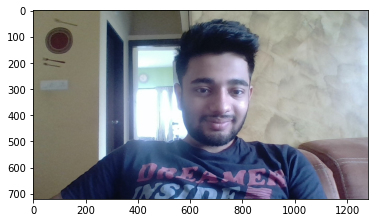

In [6]:
decrypted_img = monoalphabetic_cipher_color_decrypt(encrypted_img, reverse_key)
plt.imsave("Sample_decrypted.png",decrypted_img.astype('uint8'))
decrypted_imgplot = plt.imshow(decrypted_img.astype('uint8'))
plt.show()

In [7]:
# Evaluation using Computation time (cited from paper "A Literature Review on Image Encryption Techniques")
start = time.time()
encrypted_img = monoalphabetic_cipher_color_encrypt(img, key)
end = time.time()
print("Encryption time: "+str(end-start))
start = time.time()
decrypted_img = monoalphabetic_cipher_color_decrypt(encrypted_img, reverse_key)
end = time.time()
print("Decryption time: "+str(end-start))

Encryption time: 0.018999576568603516
Decryption time: 0.018000364303588867


In [8]:
# Evaluation using Correlation Co-Efficient (cited from paper "A Literature Review on Image Encryption Techniques")

# Along vertical direction
a = np.array(decrypted_img[:,:,0])
b = np.array(encrypted_img[:,:,0])
correlation_matrix = np.corrcoef(a, b)
correlation_matrix_display = pd.DataFrame(correlation_matrix)
display(correlation_matrix_display)
average_vertical_correlation_val = np.mean(correlation_matrix)
print("Average correlation co-efficient value along Y-axis: "+str(average_vertical_correlation_val))

# Along horizontal direction
a = np.array(decrypted_img[:,:,0]).T
b = np.array(encrypted_img[:,:,0]).T
correlation_matrix = np.corrcoef(a, b)
correlation_matrix_display = pd.DataFrame(correlation_matrix)
display(correlation_matrix_display)
average_horizontal_correlation_val = np.mean(correlation_matrix)
print("Average correlation co-efficient value along X-axis: "+str(average_horizontal_correlation_val))

# Overall average value
print("\n\n\n")
print("Average correlation co-efficient value: "+str(np.mean([average_horizontal_correlation_val,average_vertical_correlation_val])))

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,1.000000,0.999509,0.998522,0.997591,0.996519,0.995017,0.993027,0.990941,0.990120,0.988873,...,-0.020907,-0.012641,0.008672,-0.059778,0.017029,0.011787,0.012829,0.092083,0.068850,0.034115
1,0.999509,1.000000,0.999476,0.998474,0.997299,0.995850,0.993819,0.991626,0.990588,0.989196,...,-0.020386,-0.013574,0.008935,-0.059587,0.019655,0.012867,0.015188,0.092750,0.069627,0.034296
2,0.998522,0.999476,1.000000,0.999438,0.998224,0.996668,0.994619,0.992388,0.991202,0.989755,...,-0.020481,-0.014633,0.009584,-0.059726,0.021397,0.012764,0.015657,0.092349,0.070598,0.034061
3,0.997591,0.998474,0.999438,1.000000,0.999324,0.997769,0.995676,0.993500,0.992233,0.990857,...,-0.018739,-0.014808,0.010851,-0.060595,0.022254,0.012791,0.015464,0.092570,0.070890,0.035220
4,0.996519,0.997299,0.998224,0.999324,1.000000,0.999113,0.997142,0.994831,0.993312,0.991997,...,-0.017287,-0.014720,0.011686,-0.061222,0.023442,0.012496,0.015312,0.092652,0.070407,0.036112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.011787,0.012867,0.012764,0.012791,0.012496,0.012398,0.013902,0.014573,0.013554,0.013315,...,0.087827,0.132974,0.137081,0.167604,0.314562,1.000000,0.269251,0.180934,0.126351,0.115571
1436,0.012829,0.015188,0.015657,0.015464,0.015312,0.014860,0.013687,0.012446,0.009055,0.007346,...,0.078115,0.109037,0.050086,0.113325,0.171037,0.269251,1.000000,0.243852,0.136906,0.099682
1437,0.092083,0.092750,0.092349,0.092570,0.092652,0.092105,0.092567,0.092298,0.093849,0.092697,...,0.055216,0.020503,0.074601,0.084314,0.134375,0.180934,0.243852,1.000000,0.271533,0.201614
1438,0.068850,0.069627,0.070598,0.070890,0.070407,0.070517,0.071365,0.071084,0.074306,0.073848,...,0.053936,-0.024947,0.105362,0.125582,0.116635,0.126351,0.136906,0.271533,1.000000,0.299583


Average correlation co-efficient value along Y-axis: 0.08520661145737884


,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,1.000000,0.992383,0.980716,0.972677,0.966883,0.961417,0.963522,0.958136,0.953369,0.957087,...,-0.240406,-0.288132,-0.222070,-0.237070,-0.267404,-0.258786,-0.194251,-0.238465,-0.281316,-0.274605
1,0.992383,1.000000,0.993212,0.981452,0.968942,0.959875,0.964571,0.961082,0.952993,0.958240,...,-0.229429,-0.287014,-0.223862,-0.241560,-0.270581,-0.257589,-0.188923,-0.238447,-0.279364,-0.277315
2,0.980716,0.993212,1.000000,0.990316,0.973807,0.960803,0.962917,0.960264,0.948701,0.954276,...,-0.233684,-0.288315,-0.223638,-0.244581,-0.267857,-0.263818,-0.190142,-0.243510,-0.285795,-0.284547
3,0.972677,0.981452,0.990316,1.000000,0.989351,0.966800,0.964555,0.960377,0.947858,0.953965,...,-0.237498,-0.280764,-0.217736,-0.241507,-0.270531,-0.262108,-0.193066,-0.241081,-0.283083,-0.288469
4,0.966883,0.968942,0.973807,0.989351,1.000000,0.986447,0.976947,0.964194,0.952997,0.957161,...,-0.238544,-0.273087,-0.204176,-0.229788,-0.261234,-0.255377,-0.188054,-0.239405,-0.276757,-0.281147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,-0.258786,-0.257589,-0.263818,-0.262108,-0.255377,-0.261752,-0.258609,-0.250130,-0.225290,-0.220821,...,0.134492,0.174250,0.213607,0.272345,0.395209,1.000000,0.406966,0.216858,0.190106,0.188630
2556,-0.194251,-0.188923,-0.190142,-0.193066,-0.188054,-0.188621,-0.192997,-0.196316,-0.188323,-0.188637,...,0.143237,0.153750,0.197523,0.116072,0.204458,0.406966,1.000000,0.338184,0.259336,0.215113
2557,-0.238465,-0.238447,-0.243510,-0.241081,-0.239405,-0.249428,-0.254557,-0.242048,-0.227259,-0.229028,...,0.159425,0.093175,0.125892,0.228616,0.237073,0.216858,0.338184,1.000000,0.402244,0.207993
2558,-0.281316,-0.279364,-0.285795,-0.283083,-0.276757,-0.277817,-0.274923,-0.270821,-0.266494,-0.261662,...,0.169679,0.127549,0.156997,0.210479,0.158344,0.190106,0.259336,0.402244,1.000000,0.352834


Average correlation co-efficient value along X-axis: 0.09988270874277191




Average correlation co-efficient value: 0.09254466010007538


In [9]:
# Evaluation using Histogram Deviation (cited from paper "A Literature Review on Image Encryption Techniques")
img1 = cv2.imread('Sample_encrypted.png')
img2 = cv2.imread('Sample_decrypted.png')

hist1 = cv2.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist2 = cv2.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

deviation = np.abs(hist1 - hist2).sum() / (hist1.sum() + hist2.sum())

print("Histogram deviation:", deviation)

Histogram deviation: 0.99784505


In [10]:
# Evaluation using PSNR Comparison between Orignal and Decrypted image (cited from paper "A Literature Review on Image Encryption Techniques")

def psnr(img1, img2):
    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)

    mse = np.mean((img1 - img2) ** 2)
    max_pixel = 255.0

    if mse == 0:
        psnr_value = 100
        print("Identical Images!")
    else:
        psnr_value = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr_value

print("For Orignal and Encrypted Image:")
psnr1 = psnr("Sample.png", "Sample_encrypted.png")
print("PSNR value: ", psnr1) #Supposed to be low between plain and cipher image
# Typically, a PSNR value above 30 dB is considered to indicate a high level of similarity between two images, while values below 20 dB indicate significant differences between the two images.
print("\n\n")
print("For Orignal and Decrypted Image:")
psnr2 = psnr("Sample.png", "Sample_decrypted.png")
print("PSNR value: ", psnr2) #Supposed to be high between plain and decrypted image

For Orignal and Encrypted Image:
PSNR value:  27.921941911278473



For Orignal and Decrypted Image:
Identical Images!
PSNR value:  100


In [ ]:
# Diffusion tests are not performed because it a substitution method at its core

In [ ]:
# Computational Complexity for the given method will be explained.